In [2]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

Combining datasets

In [3]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# AID 2845

In [4]:
aid2845 = pd.read_csv("processed/AID_2845.csv")

In [6]:
aid2845.head()

CANONICAL_SMILES                     INCHIKEY  \
0            Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12  MSJODEOZODDVGW-UHFFFAOYSA-N   
1  O=[N+]([O-])c1cccc2ccc(/C=C/c3ccc(F)cc3)nc12  RNFYCJZPOXKMAB-UXBLZVDNSA-N   
2         O=c1c2ccccc2nc2n1CCc1c-2[nH]c2ccccc12  ACVGWSKVRYFWRP-UHFFFAOYSA-N   
3                O=C(Nc1ccc(F)cc1)c1nsc(Cl)c1Cl  GNZYHWLPACASRA-UHFFFAOYSA-N   
4      O=[N+]([O-])c1cccn2cc(-c3ccc(Br)cc3)nc12  KAUMSLOSTWQGCC-UHFFFAOYSA-N   

  PUBCHEM_ACTIVITY_OUTCOME  PUBCHEM_CID  dataset data_type  active  \
0                   Active       2690.0  aid2845     assay    True   
1                   Active    6065862.0  aid2845     assay    True   
2                   Active      65752.0  aid2845     assay    True   
3                   Active     750407.0  aid2845     assay    True   
4                   Active    5260643.0  aid2845     assay    True   

   common_name action_type  
0          NaN     agonist  
1          NaN     agonist  
2          NaN     agonist  
3          NaN     agonist  
4          NaN     agonist

In [7]:
aid2845_actives = aid2845.query("active == True")
aid2845_actives = aid2845[keep_cols_all]
aid2845_actives

CANONICAL_SMILES  \
0                    Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12   
1          O=[N+]([O-])c1cccc2ccc(/C=C/c3ccc(F)cc3)nc12   
2                 O=c1c2ccccc2nc2n1CCc1c-2[nH]c2ccccc12   
3                        O=C(Nc1ccc(F)cc1)c1nsc(Cl)c1Cl   
4              O=[N+]([O-])c1cccn2cc(-c3ccc(Br)cc3)nc12   
...                                                 ...   
2272                   CSc1ncccc1C(=O)Nc1nc2ccc(F)cc2s1   
2273        O=C(N/N=C/c1cn(Cc2ccccc2)c2ccccc12)c1cccnc1   
2274              C(=N/Nc1ccc2ccccc2n1)\c1ccc2c(c1)OCO2   
2275  C=C1C(=O)O[C@@H]2C[C@@H](C)C3=CCC(=O)[C@@]3(C)...   
2276                  O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O   

                         INCHIKEY  active  dataset data_type  common_name  \
0     MSJODEOZODDVGW-UHFFFAOYSA-N    True  aid2845     assay          NaN   
1     RNFYCJZPOXKMAB-UXBLZVDNSA-N    True  aid2845     assay          NaN   
2     ACVGWSKVRYFWRP-UHFFFAOYSA-N    True  aid2845     assay          NaN   
3     GNZYHWLPACASRA-UHFFFAOYSA-N    True  aid2845     assay          NaN   
4     KAUMSLOSTWQGCC-UHFFFAOYSA-N    True  aid2845     assay          NaN   
...                           ...     ...      ...       ...          ...   
2272  ZVFBLGBDGQPBLB-UHFFFAOYSA-N   False  aid2845     assay          NaN   
2273  RRQGXKZWPMEIHE-ZVHZXABRSA-N   False  aid2845     assay          NaN   
2274  MZMSTCBULXIQJK-VCHYOVAHSA-N   False  aid2845     assay          NaN   
2275  YUHGCHCTADWTAC-LAIRZBGTSA-N   False  aid2845     assay          NaN   
2276  UXBGZQXHNVNPFT-UHFFFAOYSA-N   False  aid2845     assay          NaN   

     action_type  
0        agonist  
1        agonist  
2        agonist  
3        agonist  
4        agonist  
...          ...  
2272     agonist  
2273     agonist  
2274     agonist  
2275     agonist  
2276     agonist  

[2277 rows x 7 columns]

# AID 743122

In [8]:
aid743122 = pd.read_csv("./processed/AID_7431223.csv")

In [9]:
aid743122_actives = aid743122.query("active == True")
aid743122_actives = aid743122_actives[keep_cols_all]

In [10]:
aid743122_actives

CANONICAL_SMILES  \
5                                   CC(C)(C)c1cc(O)ccc1O   
6                                   CC(C)(C)c1cc(O)ccc1O   
7       CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)cc1   
12       Cc1cc(N)c2cc(NC(=O)Nc3ccc4nc(C)cc(N)c4c3)ccc2n1   
18     COC(=O)C1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@...   
...                                                  ...   
10469                         CCN(CC)C(=S)SSC(=S)N(CC)CC   
10474                CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1   
10478                   CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1   
10482             CC(C)Oc1cccc(NC(=O)c2ccccc2C(F)(F)F)c1   
10483                     CCCCOCCOCCOCc1cc2c(cc1CCC)OCO2   

                          INCHIKEY  active    dataset data_type  common_name  \
5      BGNXCDMCOKJUMV-UHFFFAOYSA-N    True  aid643122     assay          NaN   
6      BGNXCDMCOKJUMV-UHFFFAOYSA-N    True  aid643122     assay          NaN   
7      VFCNQNZNPKRXIT-UHFFFAOYSA-N    True  aid643122     assay          NaN   
12     HOUSDILKOJMENG-UHFFFAOYSA-N    True  aid643122     assay          NaN   
18     BLGXFZZNTVWLAY-AMZRAFDVSA-N    True  aid643122     assay          NaN   
...                            ...     ...        ...       ...          ...   
10469  AUZONCFQVSMFAP-UHFFFAOYSA-N    True  aid643122     assay          NaN   
10474  BAZVSMNPJJMILC-UHFFFAOYSA-N    True  aid643122     assay          NaN   
10478  ZCJPOPBZHLUFHF-UHFFFAOYSA-N    True  aid643122     assay          NaN   
10482  PTCGDEVVHUXTMP-UHFFFAOYSA-N    True  aid643122     assay          NaN   
10483  FIPWRIJSWJWJAI-UHFFFAOYSA-N    True  aid643122     assay          NaN   

      action_type  
5         agonist  
6         agonist  
7         agonist  
12        agonist  
18        agonist  
...           ...  
10469     agonist  
10474     agonist  
10478     agonist  
10482     agonist  
10483     agonist  

[1063 rows x 7 columns]

# Chembl

There is only a single set of compounds in ChEMBL with substrate activity explicitly marked 



In [11]:
chembl_actives = pd.read_csv("processed/chembl_active.csv")
chembl_actives.head()

CANONICAL_SMILES                     INCHIKEY  \
0       COc1ccc(/C=C/c2cc(OC)cc(=O)o2)cc1  XLHIYUYCSMZCCC-VMPITWQZSA-N   
1                     O=c1ccc2ccc(O)cc2o1  ORHBXUUXSCNDEV-UHFFFAOYSA-N   
2  COc1ccc2[nH]c(SCc3ncc(C)c(OC)c3C)nc2c1  XURCIPRUUASYLR-UHFFFAOYSA-N   
3       COc1ccc(/C=C/c2cc(OC)cc(OC)c2)cc1  GDHNBPHYVRHYCC-SNAWJCMRSA-N   
4   O=P(OCC(Br)CBr)(OCC(Br)CBr)OCC(Br)CBr  PQYJRMFWJJONBO-UHFFFAOYSA-N   

                        common_name         dataset  active action_type  
0                          YANGONIN  ChEMBL_curated    True     agonist  
1                     UMBELLIFERONE  ChEMBL_curated    True     agonist  
2                        UFIPRAZOLE  ChEMBL_curated    True     agonist  
3            TRISMETHOXYRESVERATROL  ChEMBL_curated    True     agonist  
4  TRIS(2,3-DIBROMOPROPYL)PHOSPHATE  ChEMBL_curated    True     agonist

# FDA approved

Compounds the FDA really reccomends you try

In [12]:
fda = pd.read_csv("./FDA/fda.csv")

In [13]:
fda

CANONICAL_SMILES  active common_name  \
0  CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC    True  omeprazole   

  action_type  FDA_recommended dataset                     INCHIKEY  
0     agonist             True     FDA  SUBDBMMJDZJVOS-UHFFFAOYSA-N

# Flockheart table

In [14]:
flockheart = pd.read_csv("./processed/flockheart.csv")
flockheart.drop(columns="SMILES", inplace=True)

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [15]:
combined_literature = pd.concat([aid2845_actives, aid743122_actives, fda, flockheart, chembl_actives])
combined_literature

CANONICAL_SMILES  \
0              Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12   
1    O=[N+]([O-])c1cccc2ccc(/C=C/c3ccc(F)cc3)nc12   
2           O=c1c2ccccc2nc2n1CCc1c-2[nH]c2ccccc12   
3                  O=C(Nc1ccc(F)cc1)c1nsc(Cl)c1Cl   
4        O=[N+]([O-])c1cccn2cc(-c3ccc(Br)cc3)nc12   
..                                            ...   
717                 Cc1ccc2nc(-c3ccc(Br)cc3)nn2c1   
718              Brc1ccc(-c2nc3cc4ccccc4cn3n2)cc1   
719        Cn1c(=O)c(C(=O)Nc2ccc(F)cc2)cc2ccccc21   
720           CCN1C(=O)C(Cc2c[nH]c3ccccc23)=NC1=S   
721    CC(=O)NCCN1C(=O)C(Cc2[nH]nc3ccccc23)=NC1=S   

                        INCHIKEY  active         dataset data_type  \
0    MSJODEOZODDVGW-UHFFFAOYSA-N    True         aid2845     assay   
1    RNFYCJZPOXKMAB-UXBLZVDNSA-N    True         aid2845     assay   
2    ACVGWSKVRYFWRP-UHFFFAOYSA-N    True         aid2845     assay   
3    GNZYHWLPACASRA-UHFFFAOYSA-N    True         aid2845     assay   
4    KAUMSLOSTWQGCC-UHFFFAOYSA-N    True         aid2845     assay   
..                           ...     ...             ...       ...   
717  SIIURXZERGCUNT-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
718  JOOQDESTDDXJFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
719  ZWEIKRQKZQBEQP-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
720  AQSZRYHHFVXZSJ-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
721  DKPFQDODZFWYFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   

    common_name action_type FDA_recommended  
0           NaN     agonist             NaN  
1           NaN     agonist             NaN  
2           NaN     agonist             NaN  
3           NaN     agonist             NaN  
4           NaN     agonist             NaN  
..          ...         ...             ...  
717         NaN     agonist             NaN  
718         NaN     agonist             NaN  
719         NaN     agonist             NaN  
720         NaN     agonist             NaN  
721         NaN     agonist             NaN  

[4068 rows x 8 columns]

In [16]:
# combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [17]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

np.int64(499)

In [18]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [19]:
combined_literature_chembl = combined_literature

In [20]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
True    1
Name: count, dtype: int64

In [21]:
combined_literature_chembl.dataset.value_counts()

dataset
aid2845           2277
aid643122         1058
ChEMBL_curated     722
flockheart           5
FDA                  1
Name: count, dtype: int64

In [22]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

np.int64(495)

In [23]:
combined_literature_chembl.INCHIKEY.isna().sum()

np.int64(0)

In [24]:
combined_literature_chembl

CANONICAL_SMILES  \
0              Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12   
1    O=[N+]([O-])c1cccc2ccc(/C=C/c3ccc(F)cc3)nc12   
2           O=c1c2ccccc2nc2n1CCc1c-2[nH]c2ccccc12   
3                  O=C(Nc1ccc(F)cc1)c1nsc(Cl)c1Cl   
4        O=[N+]([O-])c1cccn2cc(-c3ccc(Br)cc3)nc12   
..                                            ...   
717                 Cc1ccc2nc(-c3ccc(Br)cc3)nn2c1   
718              Brc1ccc(-c2nc3cc4ccccc4cn3n2)cc1   
719        Cn1c(=O)c(C(=O)Nc2ccc(F)cc2)cc2ccccc21   
720           CCN1C(=O)C(Cc2c[nH]c3ccccc23)=NC1=S   
721    CC(=O)NCCN1C(=O)C(Cc2[nH]nc3ccccc23)=NC1=S   

                        INCHIKEY  active         dataset data_type  \
0    MSJODEOZODDVGW-UHFFFAOYSA-N    True         aid2845     assay   
1    RNFYCJZPOXKMAB-UXBLZVDNSA-N    True         aid2845     assay   
2    ACVGWSKVRYFWRP-UHFFFAOYSA-N    True         aid2845     assay   
3    GNZYHWLPACASRA-UHFFFAOYSA-N    True         aid2845     assay   
4    KAUMSLOSTWQGCC-UHFFFAOYSA-N    True         aid2845     assay   
..                           ...     ...             ...       ...   
717  SIIURXZERGCUNT-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
718  JOOQDESTDDXJFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
719  ZWEIKRQKZQBEQP-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
720  AQSZRYHHFVXZSJ-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
721  DKPFQDODZFWYFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   

    common_name action_type FDA_recommended  
0           NaN     agonist             NaN  
1           NaN     agonist             NaN  
2           NaN     agonist             NaN  
3           NaN     agonist             NaN  
4           NaN     agonist             NaN  
..          ...         ...             ...  
717         NaN     agonist             NaN  
718         NaN     agonist             NaN  
719         NaN     agonist             NaN  
720         NaN     agonist             NaN  
721         NaN     agonist             NaN  

[4063 rows x 8 columns]

In [25]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

appears_in_N_datasets
INCHIKEY                                          
AADIDHFXTKJENY-UHFFFAOYSA-N                      1
AADOHPJLNNJGGG-UHFFFAOYSA-N                      1
AAKJLRGGTJKAMG-UHFFFAOYSA-N                      1
AAMLNGFXXMFRGH-HYARGMPZSA-N                      1
ABPZFWGCBDFITF-UHFFFAOYSA-N                      1
...                                            ...
ZZIALNLLNHEQPJ-UHFFFAOYSA-N                      2
ZZMGAPJJSLUDBS-UHFFFAOYSA-N                      1
ZZPYRWQPKUSUJH-UHFFFAOYSA-N                      1
ZZRDAWZXJBVQSO-UHFFFAOYSA-N                      1
ZZZRUAITSXLWBH-YLLKXDJQSA-N                      1

[3568 rows x 1 columns]

In [26]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

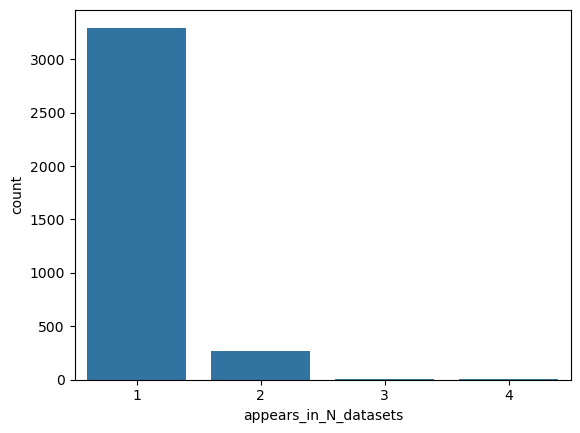

In [27]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [28]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

CANONICAL_SMILES  \
0               Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12   
1     O=[N+]([O-])c1cccc2ccc(/C=C/c3ccc(F)cc3)nc12   
2            O=c1c2ccccc2nc2n1CCc1c-2[nH]c2ccccc12   
3                   O=C(Nc1ccc(F)cc1)c1nsc(Cl)c1Cl   
4         O=[N+]([O-])c1cccn2cc(-c3ccc(Br)cc3)nc12   
...                                            ...   
4058                 Cc1ccc2nc(-c3ccc(Br)cc3)nn2c1   
4059              Brc1ccc(-c2nc3cc4ccccc4cn3n2)cc1   
4060        Cn1c(=O)c(C(=O)Nc2ccc(F)cc2)cc2ccccc21   
4061           CCN1C(=O)C(Cc2c[nH]c3ccccc23)=NC1=S   
4062    CC(=O)NCCN1C(=O)C(Cc2[nH]nc3ccccc23)=NC1=S   

                         INCHIKEY  active         dataset data_type  \
0     MSJODEOZODDVGW-UHFFFAOYSA-N    True         aid2845     assay   
1     RNFYCJZPOXKMAB-UXBLZVDNSA-N    True         aid2845     assay   
2     ACVGWSKVRYFWRP-UHFFFAOYSA-N    True         aid2845     assay   
3     GNZYHWLPACASRA-UHFFFAOYSA-N    True         aid2845     assay   
4     KAUMSLOSTWQGCC-UHFFFAOYSA-N    True         aid2845     assay   
...                           ...     ...             ...       ...   
4058  SIIURXZERGCUNT-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4059  JOOQDESTDDXJFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4060  ZWEIKRQKZQBEQP-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4061  AQSZRYHHFVXZSJ-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4062  DKPFQDODZFWYFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   

     common_name action_type FDA_recommended  appears_in_N_datasets  
0            NaN     agonist             NaN                      1  
1            NaN     agonist             NaN                      1  
2            NaN     agonist             NaN                      1  
3            NaN     agonist             NaN                      1  
4            NaN     agonist             NaN                      1  
...          ...         ...             ...                    ...  
4058         NaN     agonist             NaN                      1  
4059         NaN     agonist             NaN                      1  
4060         NaN     agonist             NaN                      1  
4061         NaN     agonist             NaN                      1  
4062         NaN     agonist             NaN                      1  

[4063 rows x 9 columns]

In [29]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

dataset_ChEMBL_curated  dataset_FDA  dataset_aid2845  dataset_aid643122  \
0                      False        False             True              False   
1                      False        False             True              False   
2                      False        False             True              False   
3                      False        False             True              False   
4                      False        False             True              False   
...                      ...          ...              ...                ...   
4058                    True        False            False              False   
4059                    True        False            False              False   
4060                    True        False            False              False   
4061                    True        False            False              False   
4062                    True        False            False              False   

      dataset_flockheart                     INCHIKEY  
0                  False  MSJODEOZODDVGW-UHFFFAOYSA-N  
1                  False  RNFYCJZPOXKMAB-UXBLZVDNSA-N  
2                  False  ACVGWSKVRYFWRP-UHFFFAOYSA-N  
3                  False  GNZYHWLPACASRA-UHFFFAOYSA-N  
4                  False  KAUMSLOSTWQGCC-UHFFFAOYSA-N  
...                  ...                          ...  
4058               False  SIIURXZERGCUNT-UHFFFAOYSA-N  
4059               False  JOOQDESTDDXJFW-UHFFFAOYSA-N  
4060               False  ZWEIKRQKZQBEQP-UHFFFAOYSA-N  
4061               False  AQSZRYHHFVXZSJ-UHFFFAOYSA-N  
4062               False  DKPFQDODZFWYFW-UHFFFAOYSA-N  

[4063 rows x 6 columns]

In [30]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [31]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [32]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

CANONICAL_SMILES  \
0               Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12   
1     O=[N+]([O-])c1cccc2ccc(/C=C/c3ccc(F)cc3)nc12   
2            O=c1c2ccccc2nc2n1CCc1c-2[nH]c2ccccc12   
3                   O=C(Nc1ccc(F)cc1)c1nsc(Cl)c1Cl   
4         O=[N+]([O-])c1cccn2cc(-c3ccc(Br)cc3)nc12   
...                                            ...   
4058                 Cc1ccc2nc(-c3ccc(Br)cc3)nn2c1   
4059              Brc1ccc(-c2nc3cc4ccccc4cn3n2)cc1   
4060        Cn1c(=O)c(C(=O)Nc2ccc(F)cc2)cc2ccccc21   
4061           CCN1C(=O)C(Cc2c[nH]c3ccccc23)=NC1=S   
4062    CC(=O)NCCN1C(=O)C(Cc2[nH]nc3ccccc23)=NC1=S   

                         INCHIKEY  active         dataset data_type  \
0     MSJODEOZODDVGW-UHFFFAOYSA-N    True         aid2845     assay   
1     RNFYCJZPOXKMAB-UXBLZVDNSA-N    True         aid2845     assay   
2     ACVGWSKVRYFWRP-UHFFFAOYSA-N    True         aid2845     assay   
3     GNZYHWLPACASRA-UHFFFAOYSA-N    True         aid2845     assay   
4     KAUMSLOSTWQGCC-UHFFFAOYSA-N    True         aid2845     assay   
...                           ...     ...             ...       ...   
4058  SIIURXZERGCUNT-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4059  JOOQDESTDDXJFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4060  ZWEIKRQKZQBEQP-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4061  AQSZRYHHFVXZSJ-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   
4062  DKPFQDODZFWYFW-UHFFFAOYSA-N    True  ChEMBL_curated       NaN   

     common_name action_type FDA_recommended  appears_in_N_datasets  \
0            NaN     agonist             NaN                      1   
1            NaN     agonist             NaN                      1   
2            NaN     agonist             NaN                      1   
3            NaN     agonist             NaN                      1   
4            NaN     agonist             NaN                      1   
...          ...         ...             ...                    ...   
4058         NaN     agonist             NaN                      1   
4059         NaN     agonist             NaN                      1   
4060         NaN     agonist             NaN                      1   
4061         NaN     agonist             NaN                      1   
4062         NaN     agonist             NaN                      1   

      dataset_ChEMBL_curated  dataset_FDA  dataset_aid2845  dataset_aid643122  \
0                      False        False             True              False   
1                      False        False             True              False   
2                      False        False             True              False   
3                      False        False             True              False   
4                      False        False             True              False   
...                      ...          ...              ...                ...   
4058                    True        False            False              False   
4059                    True        False            False              False   
4060                    True        False            False              False   
4061                    True        False            False              False   
4062                    True        False            False              False   

      dataset_flockheart  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
...                  ...  
4058               False  
4059               False  
4060               False  
4061               False  
4062               False  

[4063 rows x 14 columns]

In [33]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
agonist    4063
Name: count, dtype: int64

In [34]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

3568

In [35]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(3911)

In [36]:
# we can just sort by N_datasets as no specific chembl curation to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_datasets"], ascending=[False],  inplace=True)


In [37]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_66743/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_66743/1877288904.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [38]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(3782)

In [39]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [40]:
combined_literature_chembl_w_counts.head()

CANONICAL_SMILES  \
2318   COc1ccc2[nH]c([S+]([O-])Cc3ncc(C)c(OC)c3C)nc2c1   
2609   COc1ccc2[nH]c([S+]([O-])Cc3ncc(C)c(OC)c3C)nc2c1   
3383   COc1ccc2[nH]c([S+]([O-])Cc3ncc(C)c(OC)c3C)nc2c1   
3338   COc1ccc2[nH]c([S+]([O-])Cc3ncc(C)c(OC)c3C)nc2c1   
3335  CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC   

                         INCHIKEY  active common_name action_type  \
2318  SUBDBMMJDZJVOS-UHFFFAOYSA-N    True  OMEPRAZOLE     agonist   
2609  SUBDBMMJDZJVOS-UHFFFAOYSA-N    True  OMEPRAZOLE     agonist   
3383  SUBDBMMJDZJVOS-UHFFFAOYSA-N    True  OMEPRAZOLE     agonist   
3338  SUBDBMMJDZJVOS-UHFFFAOYSA-N    True  omeprazole     agonist   
3335  SUBDBMMJDZJVOS-UHFFFAOYSA-N    True  omeprazole     agonist   

     FDA_recommended  appears_in_N_datasets  dataset_ChEMBL_curated  \
2318             NaN                      4                    True   
2609             NaN                      4                    True   
3383             NaN                      4                    True   
3338             NaN                      4                    True   
3335            True                      4                    True   

      dataset_FDA  dataset_aid2845  dataset_aid643122  dataset_flockheart  
2318         True            False               True                True  
2609         True            False               True                True  
3383         True            False               True                True  
3338         True            False               True                True  
3335         True            False               True                True

In [41]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

2318     True
2609     True
3383     True
3338     True
3335     True
        ...  
1388    False
1389    False
1390    False
1392    False
1373    False
Name: INCHIKEY, Length: 4063, dtype: bool

In [42]:
# combined_literature_chembl_w_counts["FDA_recommended"] = combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

In [43]:
combined_literature_chembl_w_counts["FDA_recommended"] = fda_reccomends_mask

In [44]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [45]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("inhibitor")

In [46]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [47]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [48]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'final'

In [ ]:
combined_literature_chembl_w_counts

In [49]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)

<Axes: xlabel='inclusion_score', ylabel='count'>

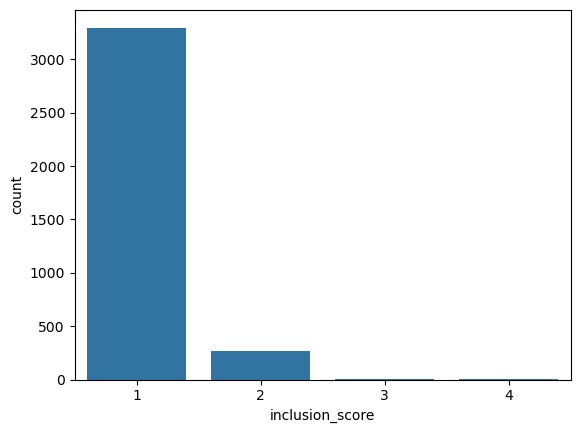

In [50]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")

In [51]:
import mols2grid
mols2grid.display(combined_literature_chembl_w_counts, smiles_col="CANONICAL_SMILES")

MolGridWidget()